In [2]:
import pandas
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import stats  # for KDE

from manim import *

Manim Community v0.16.0.post0

In [ ]:
# Transform shape. Turn a circle into a card shape

# Rotate an object around another object

# Morph text into other text


In [ ]:
# Let's spin up and instance of Jupyter notebook!

In [70]:
class UsingRotate(Scene):
    def construct(self):
        self.play(
            Rotate(
                Square(side_length=0.5).shift(UP * 2),
                angle=2*PI,
                about_point=ORIGIN,
                rate_func=linear,
            ),
            Rotate(Square(side_length=0.5), angle=2*PI, rate_func=linear),
            )



# don't remove below command for run button to work
%manim -qm -v WARNING UsingRotate

In [ ]:
#  Homotopy is our first custom definition within the construct(self)
#  definition. A homotopy is an effect applied to the listed mobjects in the animation.

#  A homotopy takes in the coordinates x,y,z, and time value t and 
# returns a set of coordinates on x,y,z  as a function of x,y,z, and t.

In [15]:
# In this first example, we apply a sine wave transformation to 
# the y-axis, which increases linearly by t.
# Specifically, in 4t sin(x), time t is the scale, and 
# x how far along the sine wave.
class HomotopyExample(Scene):
    def construct(self):
        square = Square()

        def homotopy(x, y, z, t):
            return (x, y + t * 4 * np.sin(x), z)

        self.play(Homotopy(homotopy, square, rate_func= linear, run_time=2*PI))



# don't remove below command for run button to work
%manim -qm -v WARNING HomotopyExample

In [16]:
# If instead, we use a constant scale, 
# and set t to be how far along the sine wave, 
# we get a bouncing effect.
class HomotopyExample(Scene):
    def construct(self):
        square = Square()

        def homotopy(x, y, z, t):
            return (x, y + 4 * np.sin(t), z) # This line has changed

        self.play(Homotopy(homotopy, square, rate_func= linear, run_time=2*PI))



# don't remove below command for run button to work
%manim -qm -v WARNING HomotopyExample

In [17]:
# Remove the 4x scaling, and use 10*t inside the sin() 
# to speed things up.
class HomotopyExample(Scene):
    def construct(self):
        square = Square()

        def homotopy(x, y, z, t):
            return (x, y + np.sin(10*t), z) # This line has changed

        self.play(Homotopy(homotopy, square, rate_func= linear, run_time=2*PI))



# don't remove below command for run button to work
%manim -qm -v WARNING HomotopyExample

In [28]:
# Make it a function of both x and t and now it's a rolling wave.
# Change from a square to a rectangle to see this better.
class HomotopyExample(Scene):
    def construct(self):
        rect = Rectangle(width=10.0, height=1.0) # This line has changed

        def homotopy(x, y, z, t):
            return (x, y + 0.25*np.sin(10*t + 5*x), z) # This line has changed

        self.play(Homotopy(homotopy, rect, rate_func= linear, run_time=4*PI))



# don't remove below command for run button to work
%manim -qm -v WARNING HomotopyExample

In [30]:
# To apply this to more than one mobject, put them together in a Vgroup
# Notice how the homotopy affects different mobjects differently
class HomotopyExample(Scene):
    def construct(self):
        rect = Rectangle(width=10.0, height=1.0) 
        
        # These lines have changed
        text = Text('Ride the wave', color=BLUE).scale(3).next_to(rect, UP)
        both = VGroup(rect, text) 
        
        
        def homotopy(x, y, z, t):
            return (x, y + 0.25*np.sin(10*t + 5*x), z) 

        # This line has changed
        self.play(Homotopy(homotopy, both, rate_func= linear, run_time=4*PI))



# don't remove below command for run button to work
%manim -qm -v WARNING HomotopyExample

In [31]:
 # One more from the community example repository
# https://docs.manim.community/en/stable/reference/manim.animation.movement.Homotopy.html

In [3]:
#
class HomotopyExample(Scene):
    def construct(self):
        square = Square()

        def homotopy(x, y, z, t):
            if t <= 0.25:
                progress = t / 0.25
                return (x, y + progress * 0.2 * np.sin(x), z)
            else:
                wave_progress = (t - 0.25) / 0.75
                return (x, y + 0.2 * np.sin(x + 10 * wave_progress), z)

        self.play(Homotopy(homotopy, square, rate_func= linear, run_time=2))



# don't remove below command for run button to work
%manim -qm -v WARNING HomotopyExample

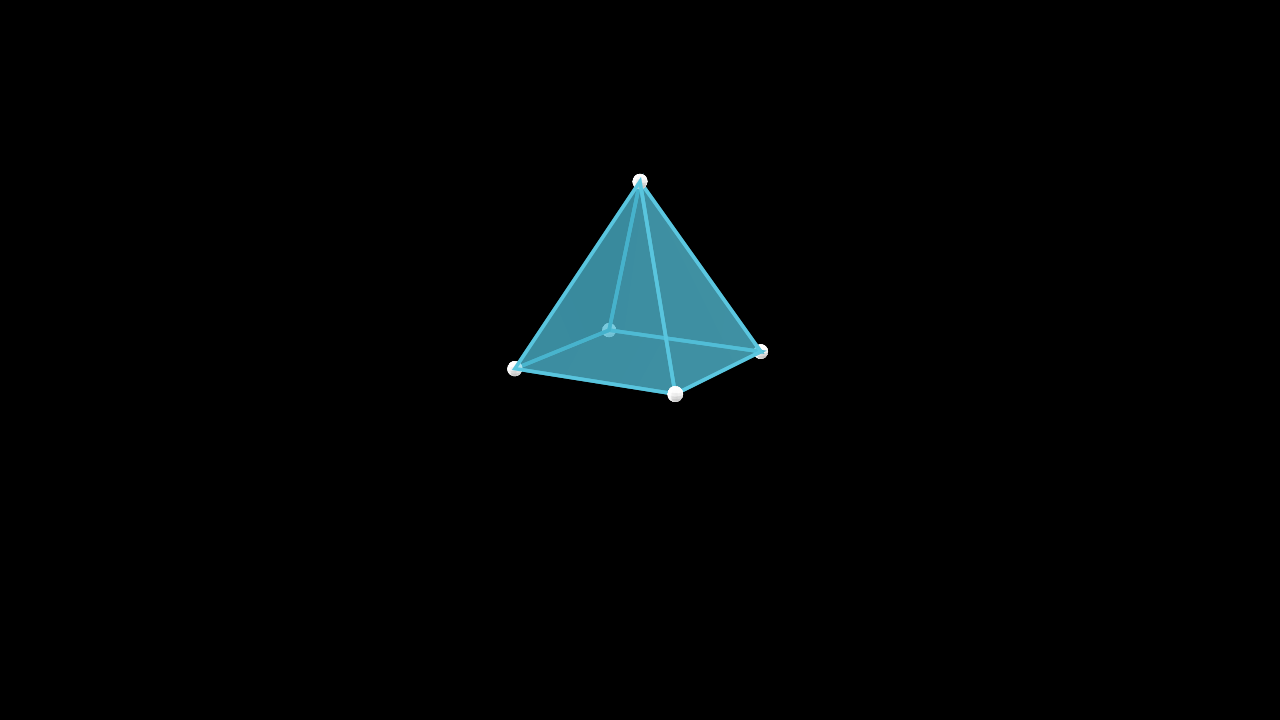

In [52]:
# ScaleInPlace scales something up to given scale while maintaining its centre.

class ScaleInPlaceExample(Scene):
    def construct(self):
        
        text = Text("Hello World!")
        square = Square()
        self.play(ScaleInPlace(text, 2))
        self.wait(1.5)
        self.play(ScaleInPlace(square, 3))


# don't remove below command for run button to work
%manim -qm -v WARNING ScaleInPlaceExample

In [55]:
# ScaleInPlace's scaling multiplies its current scale, 
# it does not set the scale to certain value.
# So if you wish to use it to scale something up to 2, 
# and then back down to 1, you need to use ScaleInPlace(... , 0.5)

class ScaleInPlaceExample2(Scene):
    def construct(self):
        
        text = Text("Hello World!")
        square = Square()
        self.play(ScaleInPlace(text, 2))
        self.wait(1.5)
        self.play(ScaleInPlace(text, 0.5))
        self.wait(1.5)

# don't remove below command for run button to work
%manim -qm -v WARNING ScaleInPlaceExample2

In [51]:
# self.play acts like a self.add as well.
# if you self.play something and it has not yet been added to the scene, it will be added.
# if you self.add first, it appears in the scene, but only 
# has its animation applied when self.play() is run.

class ScaleInPlaceExample3(Scene):
    def construct(self):
        
        text = Text("Hello World!")
        square = Square()
        
        self.add(text, square)
        self.play(ScaleInPlace(text, 2))
        self.wait(1.5)
        self.play(ScaleInPlace(square, 3))



# don't remove below command for run button to work
%manim -qm -v WARNING ScaleInPlaceExample3

In [56]:
# you can include multiple mobjects in self.play(), 
# just like you can in self.add()

class ScaleInPlaceExample4(Scene):
    def construct(self):
        
        text = Text("Hello World!")
        square = Square()
        
        self.play(ScaleInPlace(text, 2), ScaleInPlace(square, 3))
        self.wait(1.5)



# don't remove below command for run button to work
%manim -qm -v WARNING ScaleInPlaceExample4

In [57]:
# You can also Vgroup mobjects together and self play that.
# notice that you have to scale them to the same thing if you do this

class ScaleInPlaceExample5(Scene):
    def construct(self):
        
        text = Text("Hello World!")
        square = Square()
        both = VGroup(text, square)
        
        self.play(ScaleInPlace(both, 2))
        self.wait(1.5)



# don't remove below command for run button to work
%manim -qm -v WARNING ScaleInPlaceExample5

In [59]:
# When ScaleInPlace-ing a Vgroup, the centre of the group is used.
class ScaleInPlaceExample6(Scene):
    def construct(self):
        
        text = Text("Hello World!")
        text.shift(2*UP)
        square = Square()
        both = VGroup(text, square)
        
        self.play(ScaleInPlace(both, 2))
        self.wait(1.5)



# don't remove below command for run button to work
%manim -qm -v WARNING ScaleInPlaceExample6
    

In [ ]:
# For this next example, we need to explain the unpacking of variables (arguments) first.
# This is done by putting a * before the object in question.
# and it turns something that has been packed together into a single object
# back into its component elements.
# See: https://docs.python.org/3/tutorial/controlflow.html#tut-unpacking-arguments

In [33]:
# This makes a list of length 2 of values
args = [3, 6]
args


[3, 6]

In [37]:
# We can make a range using the arguments of the literal values 3 and 6
list(range(3, 6))

[3, 4, 5]

In [39]:
# We can refer to specific elements in args to do the same
list(range(args[0], args[1]))

[3, 4, 5]

In [36]:
# We cannot use args as a single argument in range
list(range(args))

TypeError: 'list' object cannot be interpreted as an integer

In [38]:
# ...unless we unpack it first
list(range(*args))

[3, 4, 5]

In [ ]:
# similarly, when we make a VGroup of mobjects like this
#  group = VGroup(Square(), Circle(), Triangle(), Star())
#  we can apply functions to the group, but there's no 
#  elegant way to apply things to specific elements of the group
#  unless we use *group

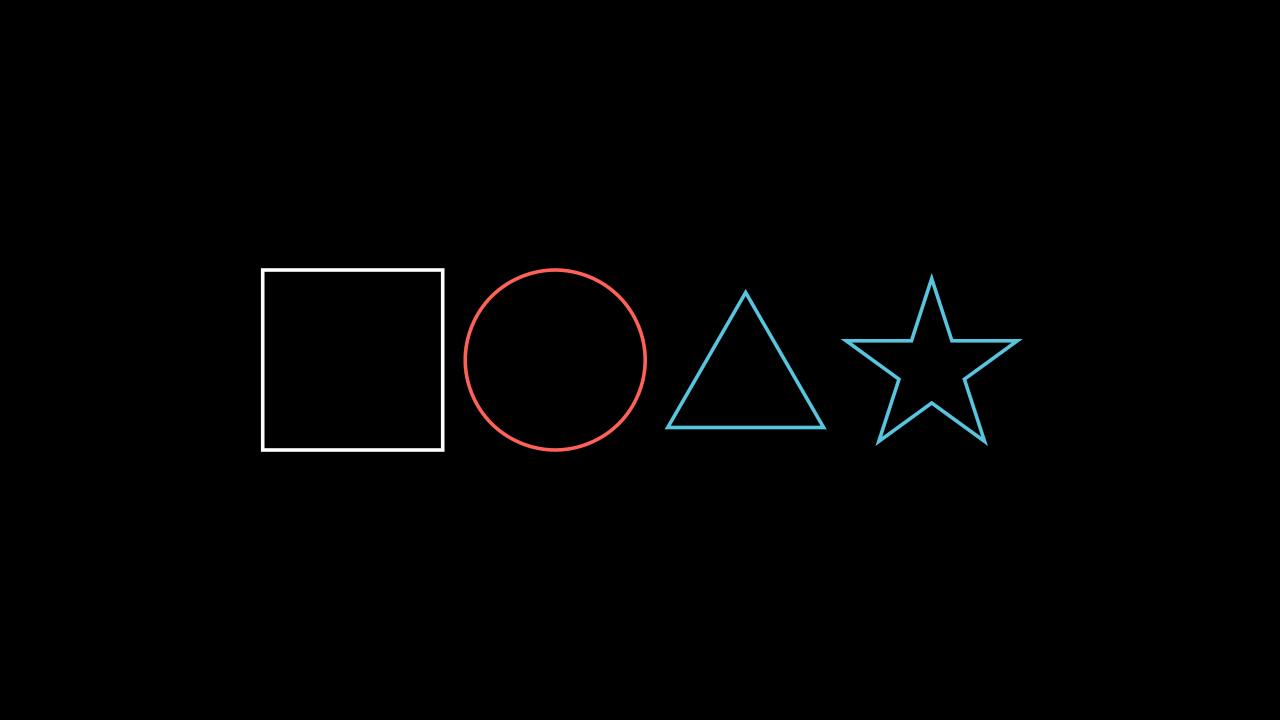

In [40]:
# Let's make a group of mobjects, and arrange them from left to right 
# with group.arrange(RIGHT)

class CyclicReplaceExample(Scene):
    def construct(self):
        group = VGroup(Square(), Circle(), Triangle(), Star())
        group.arrange(RIGHT)
        self.add(group)

# don't remove below command for run button to work
%manim -qm -v WARNING CyclicReplaceExample

In [42]:
# CyclicReplace takes an UNPACKED list of mobjects
# and physically moves them
# here, objects 1,2,3,4 
# is cycled to objects 4,1,2,3

class CyclicReplaceExample2(Scene):
    def construct(self):
        group = VGroup(Square(), Circle(), Triangle(), Star())
        group.arrange(RIGHT)
        self.add(group)

        self.play(CyclicReplace(*group))
        self.wait(2)


# don't remove below command for run button to work
%manim -qm -v WARNING CyclicReplaceExample2

In [45]:
# By adding a for() loop we can cycle through all four arrangements.
# Note that _ means "No argument", 
# as in we don't need a count argument for the for loop, 
# we just want to run exactly the same code 4 times.
# Source: https://docs.manim.community/en/stable/reference/manim.animation.transform.CyclicReplace.html

class CyclicReplaceExample(Scene):
    def construct(self):
        group = VGroup(Square(), Circle(), Triangle(), Star())
        group.arrange(RIGHT)
        self.add(group)

        for _ in range(4):
            self.play(CyclicReplace(*group))
        
        self.wait(2)



# don't remove below command for run button to work
%manim -qm -v WARNING CyclicReplaceExample

In [62]:
# Now for the big one, transforming one mobject into another
# ReplacementTransform(a, b)
# Turns mobject a into mobject b, leaving nothing behind.

In [67]:
class ReplacementTransform1(Scene):
    def construct(self):
        # set up the numbers
        r_transform = VGroup(*[Integer(i) for i in range(1,4)])
        text_1 = Text("ReplacementTransform", color=RED)
        r_transform.add(text_1)

        ints = VGroup(r_transform)
        texts = VGroup(text_1).scale(0.75)
        r_transform.arrange(direction=UP, buff=1)

        self.add(ints, texts)

        # The mobs replace each other and none are left behind
        self.play(ReplacementTransform(r_transform[0], r_transform[1]))
        self.play(ReplacementTransform(r_transform[1], r_transform[2]))

        self.wait()



# don't remove below command for run button to work
%manim -qm -v WARNING ReplacementTransform1

In [69]:
# With transform, the mobject a stays, 
# and there is a new mobject b.

class Transform1(Scene):
    def construct(self):
        # set up the numbers
        r_transform = VGroup(*[Integer(i) for i in range(1,4)])
        text_1 = Text("Transform", color=RED)
        r_transform.add(text_1)

        ints = VGroup(r_transform)
        texts = VGroup(text_1).scale(0.75)
        r_transform.arrange(direction=UP, buff=1)

        self.add(ints, texts)

     # The mobs linger after the Transform()
        self.play(Transform(r_transform[0], r_transform[1]))
        self.wait()
        
        self.play(Transform(r_transform[1], r_transform[2]))
        self.wait()



# don't remove below command for run button to work
%manim -qm -v WARNING Transform1

In [75]:
class ReplacementTransform2(Scene):
    def construct(self):
        # set up the numbers
        star = Star()
        
        circle = Circle().shift(1*RIGHT)
        
        mtext = MathTex("\\frac{d}{dx}f(x)g(x)=").shift(2*DOWN)
        
        # Start with just the star mobject
        self.add(star)

        # transform and replace it with a circle
        self.play(ReplacementTransform(star, circle))
        self.wait(2)
        
        # and then with some math
        self.play(ReplacementTransform(circle, mtext))
        self.wait(2)

        # and back to star
        # wait, what? Why is it a circle now?
        # because the mobject star has BEEN REPLACED with the circle
        self.play(ReplacementTransform(mtext, star))
        self.wait(2)

# don't remove below command for run button to work
%manim -qm -v WARNING ReplacementTransform2

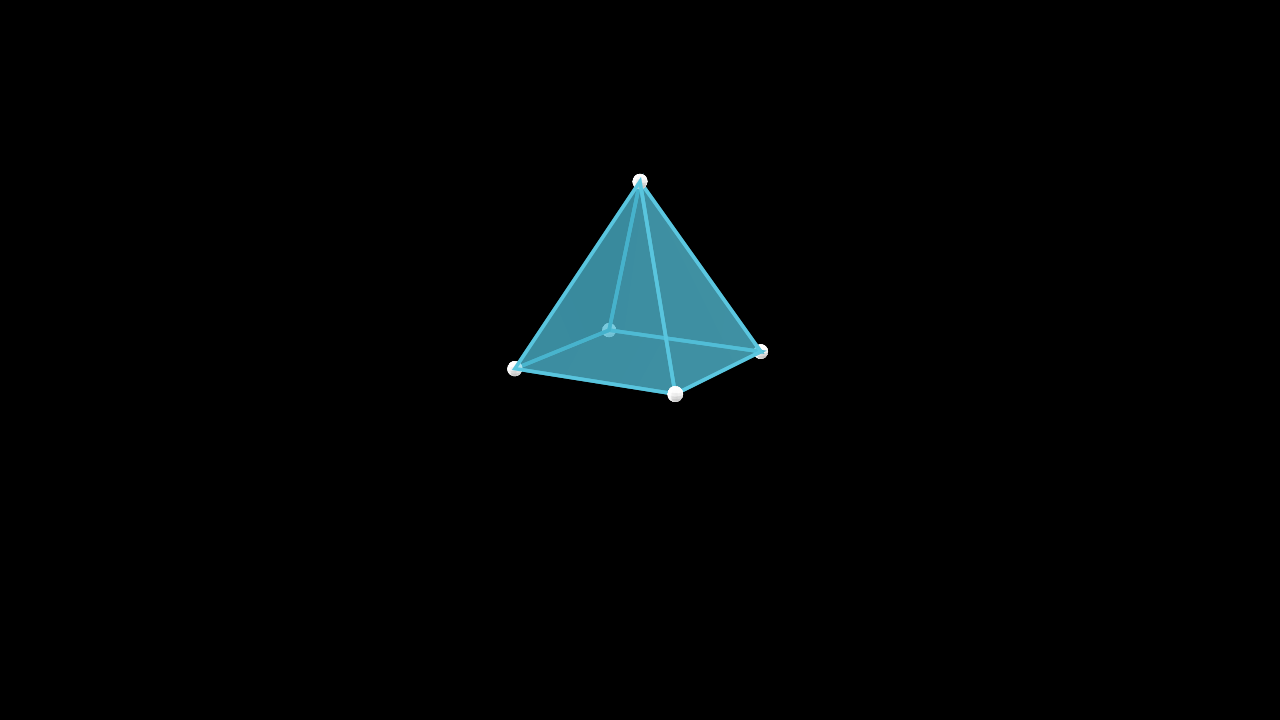

In [49]:
# Just leaving this for reference for a later lab on 3D objects
# https://docs.manim.community/en/stable/reference/manim.mobject.three_d.polyhedra.Polyhedron.html

class SquarePyramidScene(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        vertex_coords = [
            [1, 1, 0],
            [1, -1, 0],
            [-1, -1, 0],
            [-1, 1, 0],
            [0, 0, 2]
        ]
        faces_list = [
            [0, 1, 4],
            [1, 2, 4],
            [2, 3, 4],
            [3, 0, 4],
            [0, 1, 2, 3]
        ]
        pyramid = Polyhedron(vertex_coords, faces_list)
        self.add(pyramid)



# don't remove below command for run button to work
%manim -qm -v WARNING SquarePyramidScene